# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import collections as cs
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t') # Its a tab separated file

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [4]:
# Solution 1
chipo.shape[0]

4622

In [5]:
# Solution 2
len(chipo)

4622

### Step 6. What is the number of columns in the dataset?

In [6]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [9]:
#chipo.groupby('item_name').size().nlargest(1)
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

### Step 10. For the most-ordered item, how many items were ordered?

In [10]:
chipo.groupby('item_name').sum().nlargest(1, 'quantity')

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [11]:
chipo.groupby('choice_description').sum().nlargest(1, 'quantity')

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [12]:
#chipo.quantity.sum()
chipo.count()[1]

4622

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [13]:
chipo.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [14]:
chipo.item_price = chipo.item_price.apply(lambda x : x.replace('$', '').replace(',', '')).astype('float')

#### Step 13.c. Check the item price type

In [15]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [16]:
revenue = (chipo.quantity*chipo.item_price).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [17]:
#chipo.order_id.value_counts().count()
#len(chipo.order_id.unique())
chipo.order_id.nunique() # value_counts + count = nunique

1834

### Step 16. What is the average amount per order?

In [32]:
# Solution 1
chipo.revenue = chipo.quantity*chipo.item_price
avg_amount = chipo.groupby('order_id').sum()
avg_amount.mean()['item_price']

18.81142857142869

In [19]:
# Solution 2
chipo.groupby('order_id').sum().mean()['item_price']

18.81142857142869

### Step 17. How many different items are sold?

In [20]:
chipo.item_name.nunique()

50

### Step 17. How many products cost more than $10.00?

In [21]:
#chipo[chipo.item_price > 10.00].count()[1]
len(chipo[chipo.item_price > 10.00])

1130

### Step 18. What is the price of each item?
###### print a data frame with only two columns item_name and item_price

In [22]:
chipo_price = chipo.drop_duplicates(['item_name', 'item_price'])
chipo_one_prod = chipo_price[chipo_price['quantity'] == 1]
chipo_one_prod[['item_name', 'item_price']].sort_values('item_price', ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
93,Carnitas Burrito,11.75
1008,Carnitas Crispy Tacos,11.75
97,Carnitas Bowl,11.75
130,Barbacoa Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
2231,Steak Crispy Tacos,11.75
7,Steak Burrito,11.75


### Step 19. Sort by the name of the item

In [23]:
#chipo.sort_values('item_price')
chipo.item_name.sort_values()

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
3422    6 Pack Soft Drink
553     6 Pack Soft Drink
1916    6 Pack Soft Drink
1922    6 Pack Soft Drink
1937    6 Pack Soft Drink
3836    6 Pack Soft Drink
298     6 Pack Soft Drink
1976    6 Pack Soft Drink
1167    6 Pack Soft Drink
3875    6 Pack Soft Drink
1124    6 Pack Soft Drink
3886    6 Pack Soft Drink
2108    6 Pack Soft Drink
3010    6 Pack Soft Drink
4535    6 Pack Soft Drink
4169    6 Pack Soft Drink
4174    6 Pack Soft Drink
4527    6 Pack Soft Drink
4522    6 Pack Soft Drink
3806    6 Pack Soft Drink
2389    6 Pack Soft Drink
3132    6 Pack Soft Drink
3141    6 Pack Soft Drink
639     6 Pack Soft Drink
1026    6 Pack Soft Drink
              ...        
2996         Veggie Salad
3163         Veggie Salad
4084         Veggie Salad
1694         Veggie Salad
2756         Veggie Salad
4201    Veggie Salad Bowl
1884    Veggie Salad Bowl
455     Vegg

### Step 20. What was the quantity of the most expensive item ordered?

In [24]:
chipo[chipo.item_price == chipo.item_price.max()]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### Step 21. How many times were a Veggie Salad Bowl ordered?

In [25]:
chipo[chipo.item_name == 'Veggie Salad Bowl'].count()[1]

18

### Step 22. How many times people orderd more than one Canned Soda?

In [26]:
len(chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)])

20

### step 23. List of unique sodas

In [27]:
chipo.choice_description = chipo.choice_description.apply(lambda y : y.strip('[]') if type(y) is str else y)

In [28]:
chipo.item_name = chipo.item_name.astype('str')
sodas = chipo[chipo.item_name.str.contains('Canned')]
print(sodas.choice_description.unique().tolist())

['Sprite', 'Dr. Pepper', 'Mountain Dew', 'Diet Dr. Pepper', 'Coca Cola', 'Diet Coke', 'Coke', 'Lemonade', 'Nestea']


### Step 24. Create a histogram of the top 5 items bought

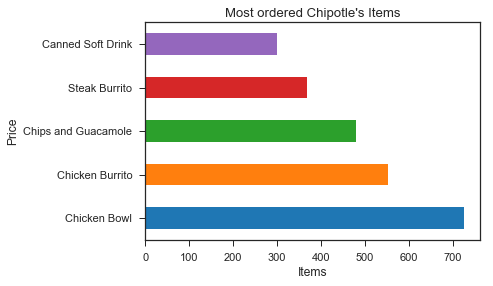

In [29]:
chipo.item_name.value_counts().nlargest(5).plot(kind='barh')
# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
# show the plot
plt.show()

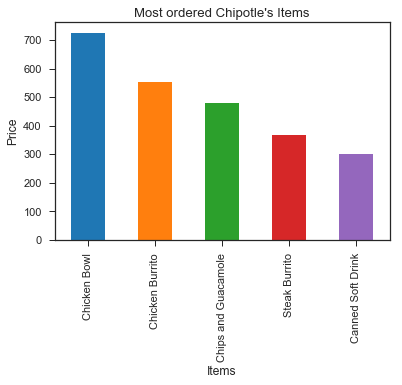

In [30]:
x = chipo.item_name

item_counts = cs.Counter(x)

df = pd.DataFrame.from_dict(item_counts, orient='index')

df = df[0].sort_values(ascending=False)[0:5]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

### Step 25. Create a scatterplot with the number of items orderered per order price
##### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5,1,'Number of items ordered per order price')

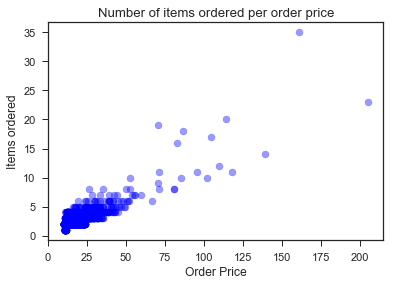

In [31]:
orders = chipo.groupby('order_id').sum()
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'blue', alpha = 0.4)
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')